# Naive Bayes

Prior probability - suggests X may be classified as BLUE because there are twice as many blue points

Likelihood of X being red is number of red points in its vicinity divided by total number of red points 

Bayes' Rule combines both probabilities

Posterior probability = prior probability * likelihood probability 

$$
P(A|B) = \frac{P(B|A)  P(A)}{P(B)}
$$

Called Naive Bayes because it assumes the presence of a certain feature in a class is independent of the presence of other features. 


# Problem 
SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5574 messages, tagged according being ham (legitimate) or spam. The files contain one message per line. Each line is composed by 2 columns: v1 contains the label and v2 contains the raw text.

In [1]:
# import libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
spam_df = pd.read_csv('data/emails.csv')

# Visualise the data

In [72]:
ham = spam_df[spam_df['spam'] == 0]
spam = spam_df[spam_df['spam'] == 1]

In [71]:
# check for imbalance
spam_df.groupby('spam').describe()
# data isn't quite imbalanced (10-20%) but it could be a problem

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

# Count vectorizer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
sample_data = ['This is the first document.', 'this document is the second document', 'and this is another document', 'i like the document.']

In [67]:
sample_vectorizer = CountVectorizer()
X = sample_vectorizer.fit_transform(sample_data)

In [68]:
print(X.toarray())

[[0 0 1 1 1 0 0 1 1]
 [0 0 2 0 1 0 1 1 1]
 [1 1 1 0 1 0 0 0 1]
 [0 0 1 0 0 1 0 1 0]]


In [69]:
print(sample_vectorizer.get_feature_names_out())

['and' 'another' 'document' 'first' 'is' 'like' 'second' 'the' 'this']


In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [75]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [77]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [78]:
spamham_countvectorizer.shape

(5728, 37303)

## Train the model

In [79]:
label = spam_df['spam'].values

In [80]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [81]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [82]:
testing_sample = ['Free money!!', 'Hi Kim, please let me know if you need any further information.Thanks']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [85]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

# Train test split

In [87]:
from sklearn.model_selection import train_test_split

X = spamham_countvectorizer
y = label

#X.shape
#y.shape

(5728,)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Evaluating the model

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 1, 1, 0])

<Axes: >

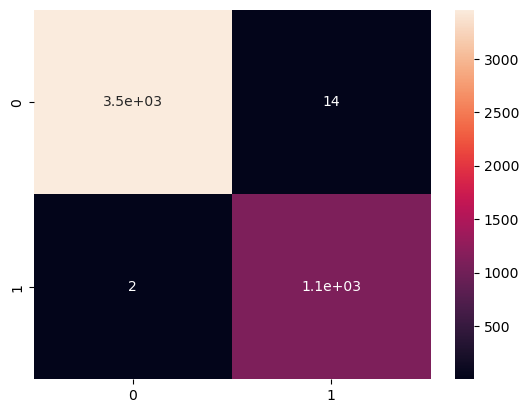

In [92]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

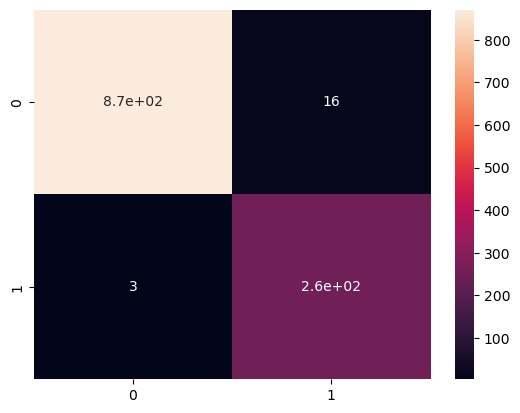

In [93]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [94]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       887
           1       0.94      0.99      0.96       259

    accuracy                           0.98      1146
   macro avg       0.97      0.99      0.98      1146
weighted avg       0.98      0.98      0.98      1146

